In [9]:
# Using Naive Bayes to classify diabetes
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Using XGBoost for classification
from xgboost import XGBClassifier

In [6]:
# Load dataset
dataset = pd.read_csv('../dataset/diabetes_selected_norm.csv')

In [7]:
# Split dataset into training and test set
X = dataset.iloc[:, 0:len(dataset.columns)-1].values
y = dataset.iloc[:, len(dataset.columns)-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
model = XGBClassifier(use_label_encoder=False, n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

[10:51:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [15]:
# Predicting the Test set results
y_pred = model.predict(X_test)

Accuracy:  0.7463768115942029
Precision:  0.8255813953488372
Recall:  0.7802197802197802
F1 score:  0.8022598870056498


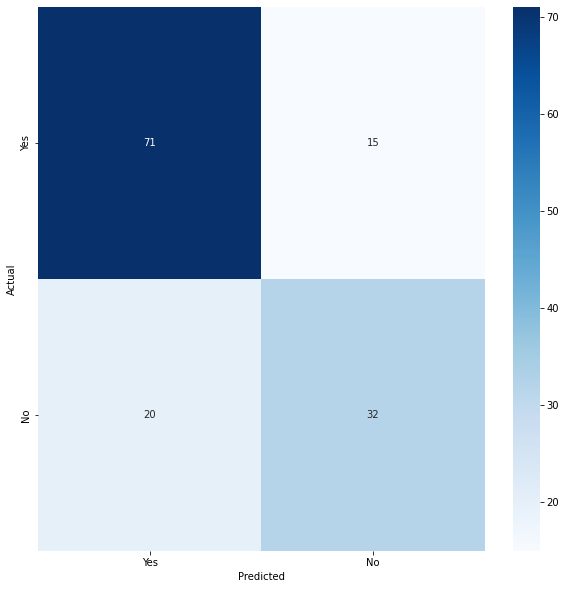

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        86
           1       0.68      0.62      0.65        52

    accuracy                           0.75       138
   macro avg       0.73      0.72      0.72       138
weighted avg       0.74      0.75      0.74       138



In [16]:
# Evaluate model
cm = confusion_matrix(y_test, y_pred)
# Accuracy
print('Accuracy: ', (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
# Precision
print('Precision: ', cm[0][0] / (cm[0][0] + cm[0][1]))
# Recall
print('Recall: ', cm[0][0] / (cm[0][0] + cm[1][0]))
# F1 score
print('F1 score: ', 2 * cm[0][0] / (2 * cm[0][0] + cm[0][1] + cm[1][0]))

# Visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
fig, ax = plt.subplots(figsize=(10,10))
# Set up the matplotlib figure
sns.heatmap(cm,  cmap='Blues', annot=True, fmt='d',
            xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

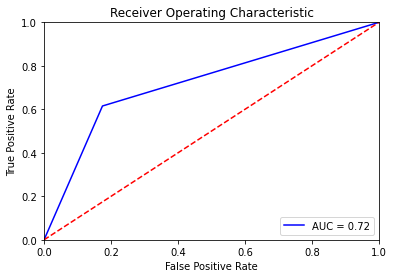

In [17]:
# Plot AUC
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()